# Machine Learning

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("../EDA/ml_csv.csv")
df.drop(columns="Unnamed: 0", axis=1, inplace=True)
df

,category,merged_text
0,business,"['ceo', 'company', 'executive', 'focus', 'empl..."
1,business,"['differently', 'love', 'take', 'amount', 'str..."
2,business,"['transition', 'qa', 'engineer', 'developer', ..."
3,business,"['president', 'indonesia', 'annoyed', 'cook', ..."
4,business,"['magento', 'problem', 'owner', 'online', 'sho..."
...,...,...
7649,weather,"['climate', 'warming', 'raise', 'danger', 'afl..."
7650,weather,"['shower', 'mlb', 'rainouts', 'day', 'since', ..."
7651,weather,"['sandstorm', 'suspend', 'flight', 'many', 'ir..."
7652,weather,"['coalition', 'climate', 'target', 'consistent..."


In [14]:
df["category"].value_counts()
category_list = df["category"].unique()

df['category_id'] = df['category'].factorize()[0]

df

,category,merged_text,category_id
0,business,"['ceo', 'company', 'executive', 'focus', 'empl...",0
1,business,"['differently', 'love', 'take', 'amount', 'str...",0
2,business,"['transition', 'qa', 'engineer', 'developer', ...",0
3,business,"['president', 'indonesia', 'annoyed', 'cook', ...",0
4,business,"['magento', 'problem', 'owner', 'online', 'sho...",0
...,...,...,...
7649,weather,"['climate', 'warming', 'raise', 'danger', 'afl...",7
7650,weather,"['shower', 'mlb', 'rainouts', 'day', 'since', ...",7
7651,weather,"['sandstorm', 'suspend', 'flight', 'many', 'ir...",7
7652,weather,"['coalition', 'climate', 'target', 'consistent...",7


### Pipeline
In order to make this flow easier to work with:  

`scikit-learn` package provides a `Pipeline` class that behaves like a compound classifier:

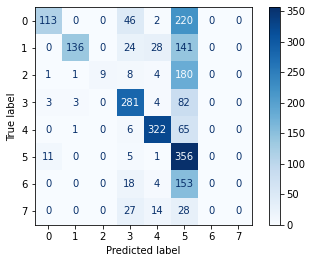

In [47]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn import metrics


from sklearn.datasets import fetch_20newsgroups

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from sklearn.metrics import plot_confusion_matrix

x = df["merged_text"]
y = df["category_id"]

#print(df[df["category_id"] == 5])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


text_clf = Pipeline([('vect', CountVectorizer()), 
                        ('norm', preprocessing.Normalizer(norm='l1')), 
                        ('clf', MultinomialNB())])
    

model = text_clf.fit(x_train, y_train)

# model = clf.predict(x_test)

dis = plot_confusion_matrix(model, x_test, y_test, cmap="Blues", values_format=".3g")
    
